In [52]:
from torch.utils.data import DataLoader

from Datasets import AllKnobsDataset_train, AllKnobsDataset_test
from Models import TransformerAgent, plot_losses
import torch

In [53]:
# Ensure data directory is populated with https://drive.google.com/drive/folders/1pjHyFlThbpXcvldabLOZZwf4dHaM-p54?usp=share_link

ticker = "AAPL"
data_dir = "../data"


allKnobs_dataset_train = AllKnobsDataset_train(ticker, data_dir)
allKnobs_dataloader_train = DataLoader(allKnobs_dataset_train, batch_size=32, shuffle=True)

allKnobs_dataset_test = AllKnobsDataset_test(ticker, data_dir)
allKnobs_dataloader_test = DataLoader(allKnobs_dataset_test, batch_size=1, shuffle=False)

In [54]:
print(len(allKnobs_dataset_train))
print(len(allKnobs_dataset_test))

1704
365


In [55]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
embedding_dim = len(allKnobs_dataset_train[0][0][0])
hidden_dim = 256
num_layers = 4
num_atn_heads = 2  # with 22 features, this can only be 1, 2, 11, or 22
checkpoint_dir = "./checkpoints/all_V5"
init_lr = 0.0004
lr_decay = 0.1
min_lr = 0.000001
decay_lr_every = 300
dropout  = 0.0
agent = TransformerAgent(embedding_dim, hidden_dim, num_atn_heads, num_layers, device, checkpoint_dir, init_lr, lr_decay, min_lr, decay_lr_every, dropout)

In [56]:
# V1 config:
# init_lr = 0.000025
# lr_decay = 0.15
# min_lr = 0.000025
# decay_lr_every = 10
# dropout  = 0.1

# V2 config:
# init_lr = 0.0004
# lr_decay = 0.01
# min_lr = 0.000001
# decay_lr_every = 4200
# dropout  = 0.1

# V3 config
# init_lr = 0.00005
# lr_decay = 0.1
# min_lr = 0.000001
# decay_lr_every = 1250
# dropout  = 0.4

In [57]:
train_agent = False
if train_agent:
    agent.train(allKnobs_dataloader_train, 1000)
# discussion
    # discuss the practical lessons we learned about transformers
    # also run this on baseline, say that both are predicting the same thing and evaluated on the same thing so we can just directly compare the loss nums
        # and say that the model that was more informed did better, so extrapolate that if we werent paywalled, we could get even better performance
    
    # was hard stuck at 406 loss no matter which configurations i tried (even after LR went to .000025 for several 100 epochs after starting at 1), until I just set the learning rate to .000025 the whole time - then it went to x. probably was jumping to some suboptimal local valley somewhere else (nonconvex). Importance of LR
        # literally show the printed logs for all methods i tried
    # also worked the same (and trained much much faster) when I heavily simplified the architecture of the network - shows that practically you usually do not need heavy complexity with
    
    # tried adam, l2 vs l1

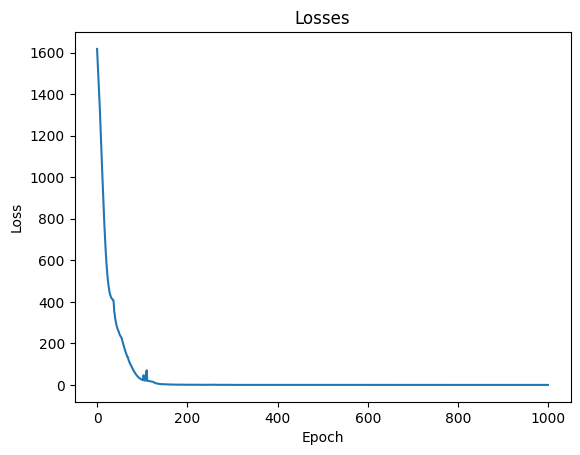

In [58]:
load_agent = True
checkpoint_file = "./checkpoints/all_V2/05-05_11-38-59_agent_600.pth"

if load_agent:
    agent.load_model(checkpoint_file)
    plot_losses("./checkpoints/all_V5/returns/05-06_12-49-31.npy")

Average Loss: 0.0031928728348032745
Directional Accuracy: 0.549618320610687


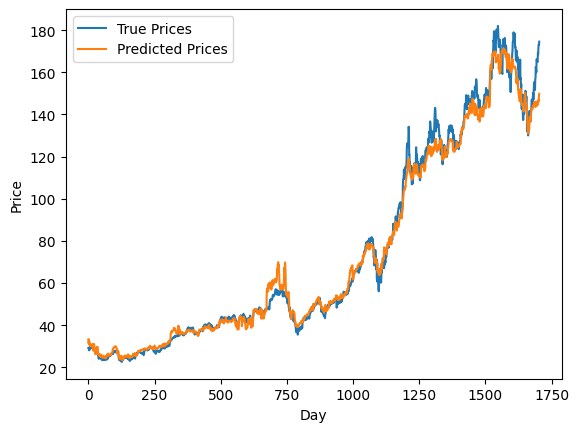

In [59]:
evaluate_agent_train = True
if evaluate_agent_train:
    agent.evaluate(DataLoader(allKnobs_dataset_train, batch_size=1, shuffle=False))

Average Loss: 0.19632565519131634
Directional Accuracy: 0.489010989010989


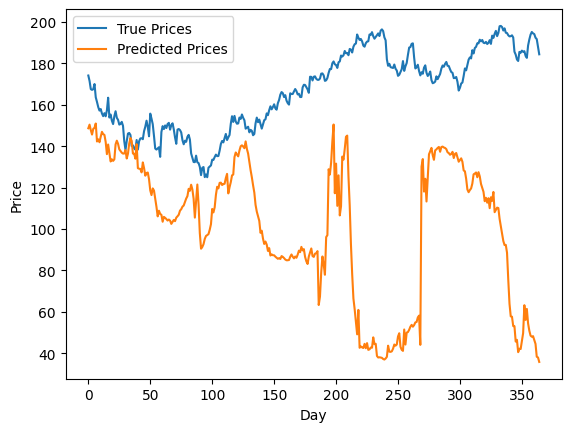

In [60]:
evaluate_agent = True
if evaluate_agent:
    agent.evaluate(allKnobs_dataloader_test)